In [1]:
# Importando bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [5]:
# Caminho dos dados
base_dir = './datasets/sand'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [6]:
# Criando geradores de dados com aumento de dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Configurando os lotes de treino, validação e teste
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['red', 'black']
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['red', 'black']
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    classes=['red', 'black']
)

Found 395 images belonging to 2 classes.


Found 30 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [8]:
    
# Construindo o modelo da rede neural com dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adicionando dropout para evitar overfitting
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Treinando o modelo
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-18 11:10:02.334945: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-03-18 11:10:13.390727: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6030 - loss: 0.6889 - val_accuracy: 0.8667 - val_loss: 0.2623
Epoch 2/10


2024-03-18 11:10:43.865622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


 1/13 ━━━━━━━━━━━━━━━━━━━━ 4:09 21s/step - accuracy: 0.7188 - loss: 0.6358

2024-03-18 11:10:53.267055: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8462 - loss: 0.3764 - val_accuracy: 0.9000 - val_loss: 0.4733
Epoch 3/10


2024-03-18 11:11:23.353073: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


 1/13 ━━━━━━━━━━━━━━━━━━━━ 4:08 21s/step - accuracy: 0.9062 - loss: 0.2007

2024-03-18 11:11:31.830157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9498 - loss: 0.1745 - val_accuracy: 0.9667 - val_loss: 0.1686
Epoch 4/10


2024-03-18 11:12:01.209260: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


 1/13 ━━━━━━━━━━━━━━━━━━━━ 4:10 21s/step - accuracy: 1.0000 - loss: 0.0430

2024-03-18 11:12:10.643086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9726 - loss: 0.1168 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 5/10


2024-03-18 11:12:40.166629: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


 1/13 ━━━━━━━━━━━━━━━━━━━━ 4:32 23s/step - accuracy: 1.0000 - loss: 0.0233

2024-03-18 11:12:51.308109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9607 - loss: 0.1332 - val_accuracy: 1.0000 - val_loss: 0.0247
Epoch 6/10


2024-03-18 11:13:19.020798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


 1/13 ━━━━━━━━━━━━━━━━━━━━ 4:33 23s/step - accuracy: 0.9688 - loss: 0.1350

2024-03-18 11:13:30.246673: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9667 - loss: 0.1354 - val_accuracy: 0.9333 - val_loss: 0.2247
Epoch 7/10


2024-03-18 11:15:39.186376: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-03-18 11:15:50.578906: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9491 - loss: 0.1254 - val_accuracy: 0.9667 - val_loss: 0.2252
Epoch 8/10


2024-03-18 11:16:19.162162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8


 1/13 ━━━━━━━━━━━━━━━━━━━━ 4:11 21s/step - accuracy: 0.9688 - loss: 0.0602

2024-03-18 11:16:27.767824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9695 - loss: 0.0498 - val_accuracy: 0.9667 - val_loss: 0.2958
Epoch 9/10


2024-03-18 11:16:58.366625: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-03-18 11:17:06.759531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9866 - loss: 0.0478 - val_accuracy: 0.7667 - val_loss: 2.2554
Epoch 10/10


2024-03-18 11:17:36.384457: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8


 1/13 ━━━━━━━━━━━━━━━━━━━━ 4:37 23s/step - accuracy: 1.0000 - loss: 0.0139

2024-03-18 11:17:47.867081: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9864 - loss: 0.0393 - val_accuracy: 0.9333 - val_loss: 0.5924


13/13: quantidade de lote de dados (batches).
[======]: barra de progresso visual.
57s: tempo demorado na época.
4s/step: tempodemorado em cada lote
loss 0.2071: discrepância entre a previsão do modelo e os rótulos reais. quanto nemor melhor.
accuracy 0.6709: a média de acertos de cada época (67%).
val_loss: 1.4082e-05: discrepância entre a previsão do modelo e os rótulos reais na validação.
val_accuracy: 0.9667: a média de acertos de cada época na validação (96%).

In [11]:
# Avaliando o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7857 - loss: 1.5280
Test Loss: 1.5280342102050781, Test Accuracy: 0.7857142686843872


In [12]:
# Salvando o modelo
model.save('TG/soil_classifier_model.h5')

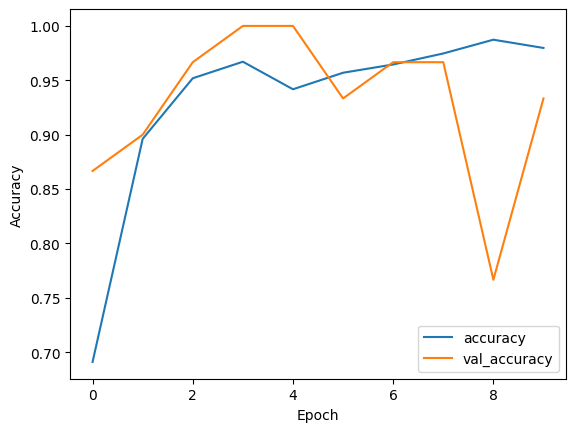

In [13]:
# Visualizando as curvas de treino e validação
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: 
Após cada época de treinamento significa que em média o modelo acertou 70%, 75%, 80%... das imagens no conjunto de treinamento.

Val Accuracy:
Significa o mesmo que a Accuracy, poém ela representa os resultados da validação após cada ápoca

**MATRIZ DE CONFUSÃO**

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [16]:
# Avaliando o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7857 - loss: 1.5280
Test Loss: 1.5280342102050781, Test Accuracy: 0.7857142686843872


In [17]:
# Gerar as previsões do modelo para o conjunto de teste
predictions = model.predict(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [18]:
# Converter as previsões em rótulos binários
binary_predictions = np.where(predictions > 0.5, 1, 0)

In [19]:
# Obter os rótulos verdadeiros do conjunto de teste
true_labels = test_generator.classes

In [20]:
# Calcular a matriz de confusão
cm = confusion_matrix(true_labels, binary_predictions)

In [21]:
# Exibir a matriz de confusão
print('Matriz de Confusão:')
print(cm)

Matriz de Confusão:
[[2 5]
 [2 5]]


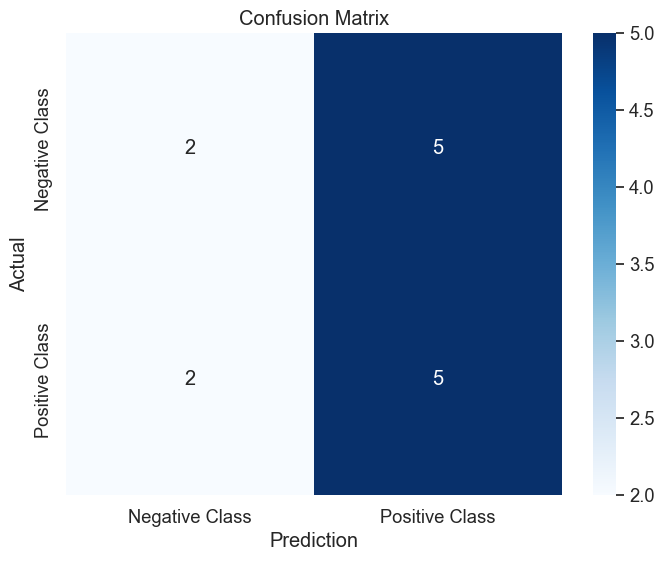

In [25]:
# Define the classes (labels) for the x and y axes of the confusion matrix
classes = ['Negative Class', 'Positive Class']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**CURVA ROC**

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score



In [28]:
y_pred = model.predict(test_generator)
y_true = test_generator.classes



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [29]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc_score = roc_auc_score(y_true, y_pred)


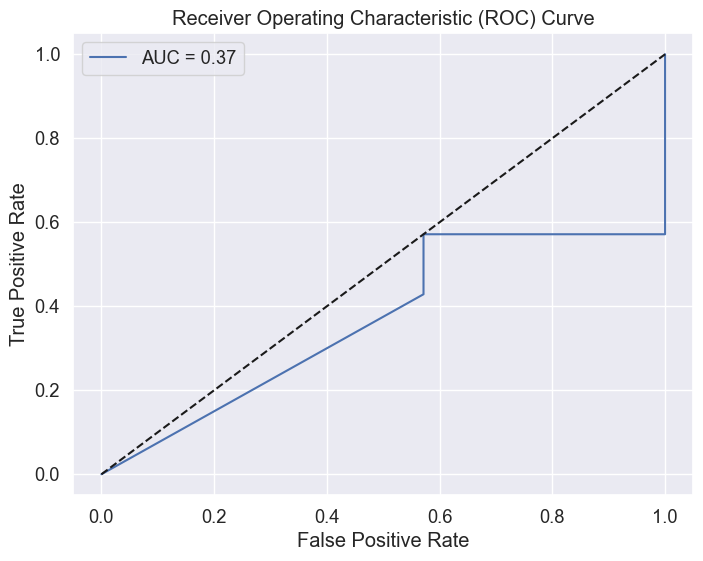

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
